# Atividades

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray
from skimage.io import imsave
from skimage.restoration import denoise_nl_means
import numpy as np
from skimage.filters import threshold_otsu
from skimage.filters import sobel,roberts,prewitt,scharr
from skimage.draw import rectangle,rectangle_perimeter

1) Leia uma imagem colorida, transforme a mesma em níveis de cinza e salve o resultado em disco. 

In [2]:
def ler_cinza(nome):
    imagem = imread(nome)[:,:,:3]
    cinza = rgb2gray(imagem)
    return cinza, imagem

In [3]:
nameFile = 'pearl.jpg'

In [4]:
cinza, imagem = ler_cinza(nameFile);
imagem.shape

(342, 608, 3)

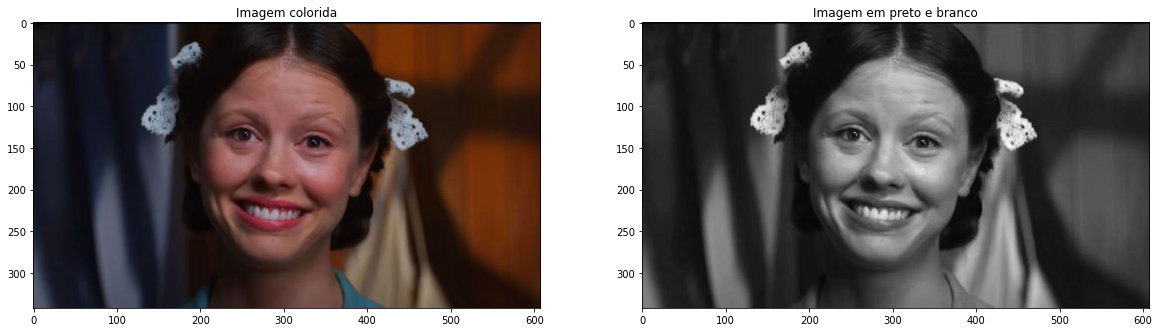

In [5]:
fig, ax = plt.subplots(1,2,figsize=(20, 20),sharex=True)
ax[0].imshow(imagem);
ax[0].set_title('Imagem colorida');
ax[1].imshow(cinza, cmap = 'gray');
ax[1].set_title('Imagem em preto e branco');

In [6]:
imsave(f'{nameFile.split(".")[0]}_b&w.png', cinza)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [7]:
cinza.shape

(342, 608)

2) Leia uma imagem colorida, transforme a mesma em níveis de cinza. Após isso, atribua o valor zero a todos os pixels cujo vizinho à direita tenha o mesmo valor de intensidade. Salve o resultado em disco.

In [8]:
def zeroVizinho(imagem):
    linhas, colunas = imagem.shape
    
    for l in range(linhas):
        for c in range(colunas - 1):
            if (imagem[l, c] == imagem[l, c+1]):
                imagem[l, c] = 0
    

    plt.imshow(imagem, cmap='gray')
    imsave(f'{nameFile.split(".")[0]}_b&w_zero.png', imagem);

    return imagem

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


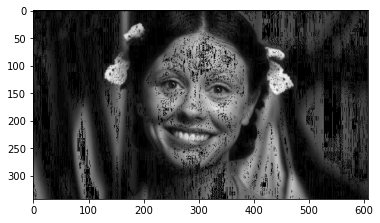

In [9]:
zeroVizinho(cinza);

3) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB. Calcule a maior e menor intensidade dos pixels em cada componente.

In [10]:
def verDimensao(dimensao):
    if dimensao == 0:
        resultado = 'r'
    elif dimensao == 1:
        resultado = 'g'
    else:
        resultado = 'b'
    return resultado

In [11]:
def maiorMenor(imagem):
    linhas, colunas, dimensoes = imagem.shape
    
    maior = {'r': 0, 'g': 0, 'b': 0}
    menor = {'r': 255, 'g': 255, 'b': 255}
    
    for d in range(dimensoes):
        color = verDimensao(d)

        for l in range(linhas):
            for c in range(colunas - 1):
                if (imagem[l, c, d] > maior[color]):
                    maior[color] = imagem[l, c, d]
                if (imagem[l, c, d] < menor[color]):
                    menor[color] = imagem[l, c, d]
    
    return maior, menor

In [12]:
maior, menor = maiorMenor(imagem)
print(f'Maiores intensidade:..................{maior}')
print(f'Menores intensidade:..................{menor}')

Maiores intensidade:..................{'r': 211, 'g': 184, 'b': 210}
Menores intensidade:..................{'r': 0, 'g': 0, 'b': 0}


4) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB.  Atribua o valor 255 a todos os pixels com intensidade maior que 150, faça isso em cada componente. Após isso, junte as componentes para formar uma imagem colorida novamente e salve o resultado.

5) Aplique ruído em uma imagem utilizando a função "skimage.util.random_noise" com os seguites parâmentros: ‘s&p’, ‘gaussian’ e ‘speckle’. Cada um desses parâmetros irá gerar uma imagem com ruído. Após isso, aplique funções disponíveis em 'skimage.restoration' para recuperar as imagens.

6) Aplique pelo menos 4 métodos diferentes para binarizar uma imagem ('skimage.filters').

7) Aplique pelo menos 4 métodos diferentes ('skimage.filters') para calcular as bordas de uma imagem utilizando como entrada o resultado da questão anterior.

8) Recorte uma imagem da seguinte forma:
- O corte será feito no canal de cor com a maior media de pixels.
- O centro do corte deve ser o pixel com o maior desvio padrão em uma janela 3x3.
- O tamanho do recorte será 1/4 do tamanho da imagem. Ex: Imagem 100 x 80 -> Recorte 25 x 20
- Cuidado com as bordas! Caso uma janela fique fora da imagem, o centro do recorte deverá ser alterado.